# Google Colab link 

https://colab.research.google.com/drive/1pmQzQWK4qvCO5WeMgX3B7SEJwsGDHUcf?usp=sharing

In [1]:
# Module Imports - Add any additional modules here
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers, models, optimizers, losses, callbacks, regularizers
from optimizers import SGD, Adam, Adagrad
from keras.regularizers import l2

import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [4]:
# Loading the Dataset. Here we use the CIFAR-10 dataset of labelled images

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Rescale the pixel values
x_train = x_train/255.
x_test = x_test/255.

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# List of label names
class_names = ['plane', 'car', 'bird', 'cat', 'deer',
               'canine', 'frog', 'horse', 'boat', 'truck']

# Task 1 - Initial Model

**Model Architecture**


In [5]:
### Create the model using the provided architecture

# Define input layer
inputs = keras.Input(shape=(32, 32, 3), name="Input")

# Define convolutional layers
conv_1 = layers.Conv2D(16, 3, padding="same", activation="relu", name="conv_1")(inputs)
conv_2 = layers.Conv2D(16, 3, padding="same", activation="relu", name="conv_2")(conv_1)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name="pool_1")(conv_2)
conv_3 = layers.Conv2D(32, 3, padding="same", activation="relu", name="conv_3")(pool_1)
conv_4 = layers.Conv2D(32, 3, padding="same", activation="relu", name="conv_4")(conv_3)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name="pool_2")(conv_4)
conv_5 = layers.Conv2D(64, 3, padding="same", activation="relu", name="conv_5")(pool_2)
conv_6 = layers.Conv2D(64, 3, padding="same", activation="relu", name="conv_6")(conv_5)
pool_3 = layers.MaxPooling2D(pool_size=(2, 2), name="pool_3")(conv_6)

# Define fully connected layers
flat = layers.Flatten(name="flat")(pool_3)
fc_1 = layers.Dense(512, activation="relu", name="fc_1")(flat)

# Define output layer
outputs = layers.Dense(num_classes, activation="softmax", name="Output")(fc_1)

# Create Keras Model instance
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")
model.summary()


Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 16)        2320      
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 16)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 32)        4640      
                                                                 
 conv_4 (Conv2D)             (None, 16, 16, 32)        9248      
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 32)          

In [ ]:
### Compile the model using the SGC optimizer, with default learning rate, Sparse Categorical Crossentropy, and accuracy metric.

model.compile(optimizer=SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
### Train the model for 50 epochs, with a batch size of 128. Include the test data for model validation. Store the losses and metrics in a history object.

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(x_test, y_test))


Epoch 1/50
391/391 [==============================] - 5s 10ms/step - loss: 2.2834 - accuracy: 0.1254 - val_loss: 2.2303 - val_accuracy: 0.1926
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 2.0973 - accuracy: 0.2410 - val_loss: 2.0183 - val_accuracy: 0.2530
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 1.8804 - accuracy: 0.3300 - val_loss: 1.8994 - val_accuracy: 0.3099
Epoch 4/50
391/391 [==============================] - 3s 9ms/step - loss: 1.7043 - accuracy: 0.3946 - val_loss: 1.7802 - val_accuracy: 0.3629
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 1.6005 - accuracy: 0.4301 - val_loss: 1.5647 - val_accuracy: 0.4342
Epoch 6/50
391/391 [==============================] - 3s 8ms/step - loss: 1.5250 - accuracy: 0.4585 - val_loss: 1.5322 - val_accuracy: 0.4455
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 1.4656 - accuracy: 0.4810 - val_loss: 1.4529 - val_accuracy: 0.4762
Epoch

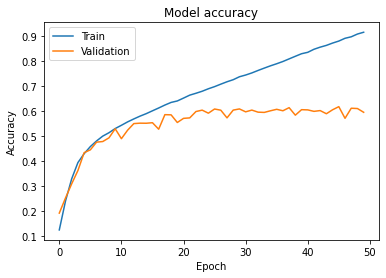

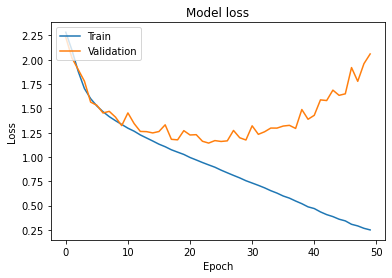

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



313/313 [==============================] - 1s 3ms/step


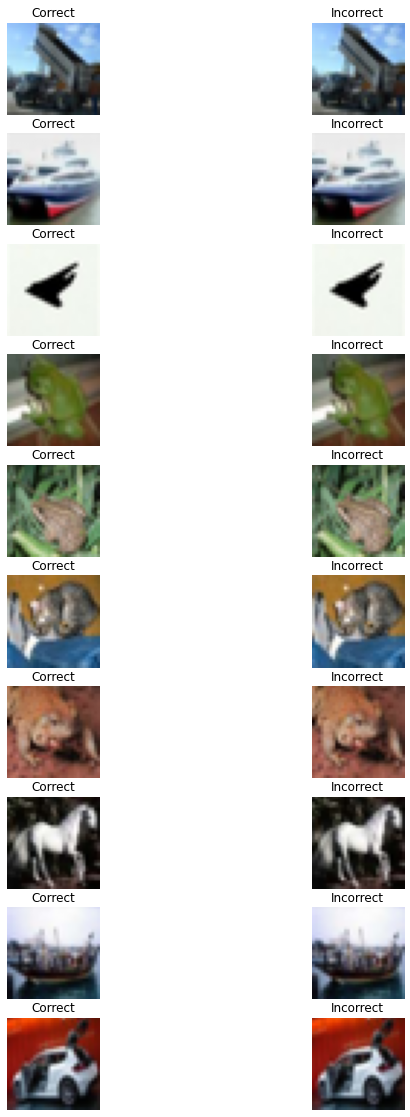

In [ ]:
"""
Create plots of the losses and metrics of the training and validation data,
and plots that shows example test images from each class that have been 
correctly AND incorrectly labelled by the model. 
Get the predicted classes for the test set.
""" 
y_test_pred = model.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Create a figure with subplots for each class
num_classes = 10
fig, axes = plt.subplots(num_classes, 2, figsize=(10, 20))

# Loop through each class
for i in range(num_classes):
    # Find indices of test images that are actually of this class
    class_indices = np.where(y_test == i)[0]
    if len(class_indices) == 0:
        continue
    
    # Plot correctly classified images
    ax = axes[i, 0]
    correct_indices = np.where(y_test_pred_classes == i)[0]
    if len(correct_indices) > 0:
        j = correct_indices[0]
        ax.imshow(x_test[j])
        ax.set_title("Correct")
        ax.axis("off")
        
    # Plot incorrectly classified images
    ax = axes[i, 1]
    ax.axis("off")
    incorrect_indices = np.where(y_test_pred_classes == i)[0]
    if len(incorrect_indices) > 0:
        j = incorrect_indices[0]
        ax.imshow(x_test[j])
        ax.set_title("Incorrect")
        ax.axis("off")

plt.show()


# Task 2 - Testing Optimizers


In [6]:
"""
Utility function that resets the weights of your model. Call this before
recompiling your model with updated settings, to ensure you train the model
from scratch.
"""

def reinitialize(model):
    # Loop over the layers of the model
    for l in model.layers:
        # Check if the layer has initializers
        if hasattr(l,"kernel_initializer"):
            # Reset the kernel weights
            l.kernel.assign(l.kernel_initializer(tf.shape(l.kernel)))
        if hasattr(l,"bias_initializer"):
            # Reset the bias
            l.bias.assign(l.bias_initializer(tf.shape(l.bias)))

# Function modified from here: https://stackoverflow.com/questions/63435679/reset-all-weights-of-keras-model

In [7]:
### Test the SGD Optimizer, plus two others of your choice, with a range of learning rates.

# Define function to train model with different optimizer and learning rate
def train_model(optimizer, learning_rate):
    # Reset model weights
    reinitialize(model)
    
    # Compile model with selected optimizer and learning rate
    model.compile(optimizer=optimizer(learning_rate=learning_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    # Train model for 50 epochs with batch size of 128
    history = model.fit(x_train, y_train, epochs=50, batch_size=128,
                        validation_data=(x_test, y_test))
    
    return history

# Test SGD optimizer with learning rates of 0.001, 0.01, and 0.1
sgd_lr001_history = train_model(SGD, 0.001)
sgd_lr01_history = train_model(SGD, 0.01)
sgd_lr1_history = train_model(SGD, 0.1)

# Test Adam optimizer with learning rates of 0.001, 0.01, and 0.1
adam_lr001_history = train_model(Adam, 0.001)
adam_lr01_history = train_model(Adam, 0.01)
adam_lr1_history = train_model(Adam, 0.1)

# Test Adagrad optimizer with learning rates of 0.001, 0.01, and 0.1
adagrad_lr001_history = train_model(Adagrad, 0.001)
adagrad_lr01_history = train_model(Adagrad, 0.01)
adagrad_lr1_history = train_model(Adagrad, 0.1)


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/50
391/391 [==============================] - 14s 10ms/step - loss: 2.3021 - accuracy: 0.1001 - val_loss: 2.3018 - val_accuracy: 0.0998
Epoch 2/50
391/391 [==============================] - 3s 9ms/step - loss: 2.3015 - accuracy: 0.1006 - val_loss: 2.3011 - val_accuracy: 0.1004
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 2.3007 - accuracy: 0.1037 - val_loss: 2.3002 - val_accuracy: 0.1068
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 2.2997 - accuracy: 0.1139 - val_loss: 2.2990 - val_accuracy: 0.1255
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 2.2984 - accuracy: 0.1401 - val_loss: 2.2976 - val_accuracy: 0.1562
Epoch 6/50
391/391 [==============================] - 4s 9ms/step - loss: 2.2969 - accuracy: 0.1621 - val_loss: 2.2960 - val_accuracy: 0.1732
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 2.2951 - accuracy: 0.1718 - val_loss: 2.2939 - val_accuracy: 0.1805
Epoc

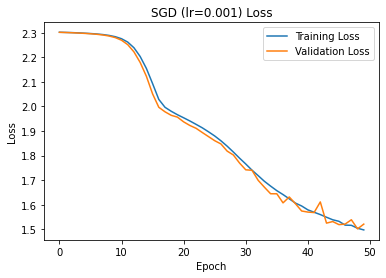

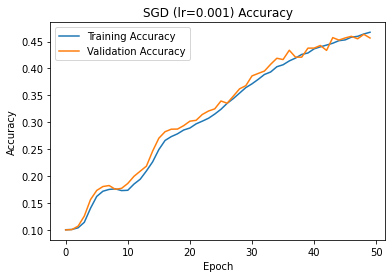

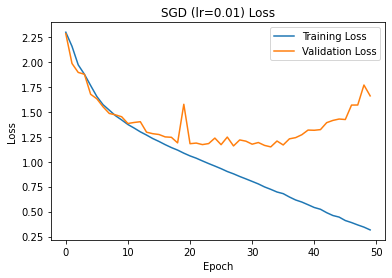

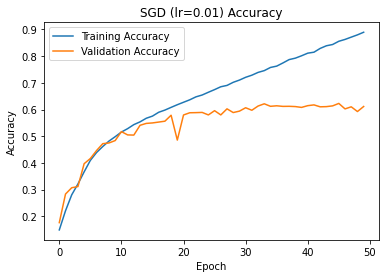

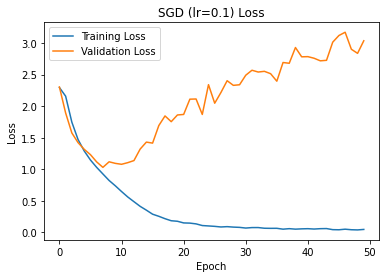

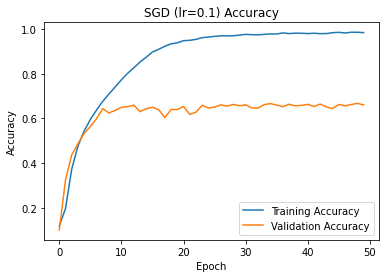

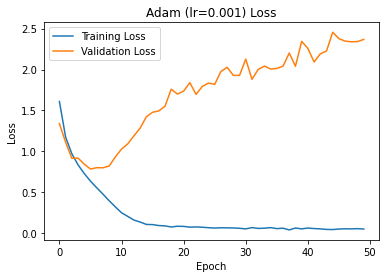

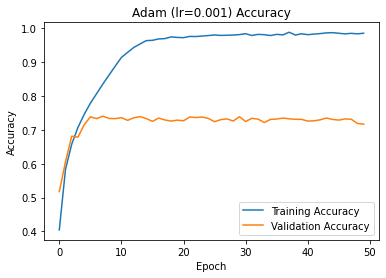

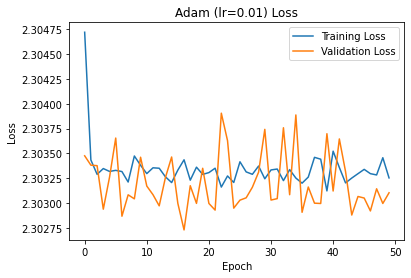

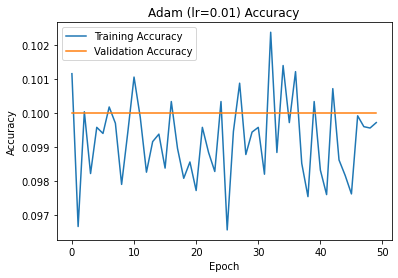

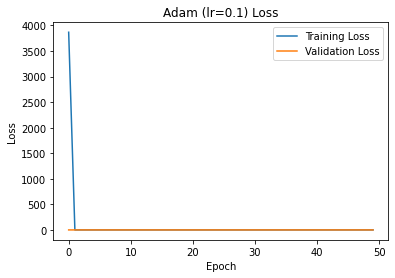

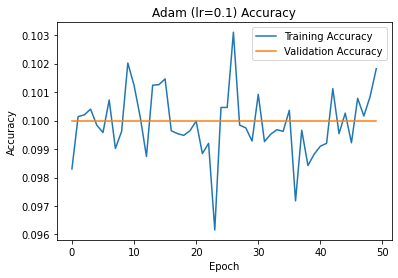

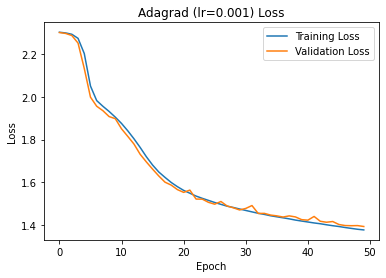

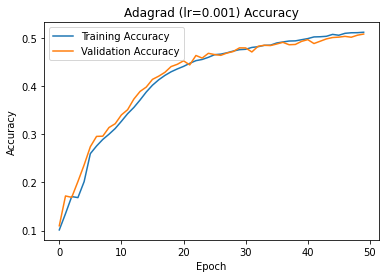

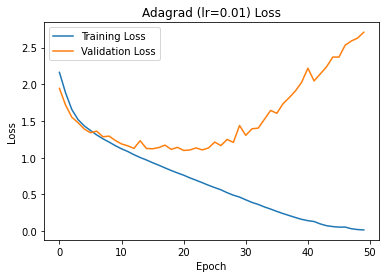

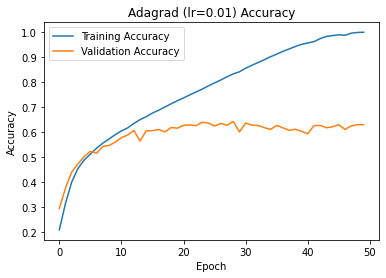

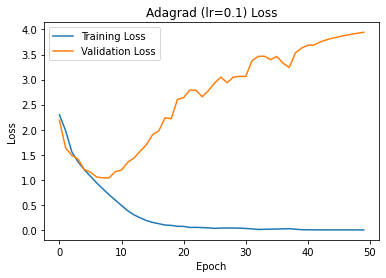

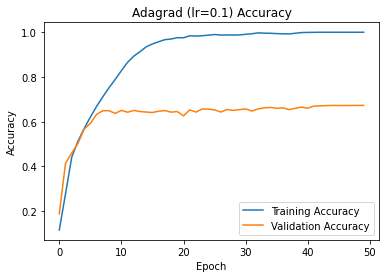

In [8]:
# Define a function to plot the loss and accuracy curves for a given history object
def plot_curves(history, title):
    # Get the training and validation losses and accuracies
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    
    # Plot the training and validation loss curves
    plt.plot(loss, label="Training Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.title(f"{title} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    # Plot the training and validation accuracy curves
    plt.plot(acc, label="Training Accuracy")
    plt.plot(val_acc, label="Validation Accuracy")
    plt.title(f"{title} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Plot the loss and accuracy curves for each optimizer with different learning rates
plot_curves(sgd_lr001_history, "SGD (lr=0.001)")
plot_curves(sgd_lr01_history, "SGD (lr=0.01)")
plot_curves(sgd_lr1_history, "SGD (lr=0.1)")

plot_curves(adam_lr001_history, "Adam (lr=0.001)")
plot_curves(adam_lr01_history, "Adam (lr=0.01)")
plot_curves(adam_lr1_history, "Adam (lr=0.1)")

plot_curves(adagrad_lr001_history, "Adagrad (lr=0.001)")
plot_curves(adagrad_lr01_history, "Adagrad (lr=0.01)")
plot_curves(adagrad_lr1_history, "Adagrad (lr=0.1)")


# Task 3 - Testing Batch Sizes


In [ ]:


def train_model(optimizer, learning_rate, batch_size):
    # Reset the weights of the model
    reinitialize(model)
    
    # Compile the model with the given optimizer and learning rate
    model.compile(optimizer(learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])
    
    # Define Early Stopping callback
    early_stopping = EarlyStopping(monitor="val_loss", patience=3, verbose=1, restore_best_weights=True)

    # Train the model with the given batch size and Early Stopping callback
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=50, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[early_stopping])
    end_time = time.time()
    
    # Record the time taken for each epoch
    time_per_epoch = (end_time - start_time) / len(history.history["loss"])
    
    return history, time_per_epoch


In [ ]:
# Define a range of batch sizes to test
batch_sizes = [32, 64, 128, 256, 512]

# Train the model with each batch size and record the history and time per epoch
histories = []
time_per_epochs = []
for batch_size in batch_sizes:
    history, time_per_epoch = train_model(SGD, 0.001, batch_size)
    histories.append(history)
    time_per_epochs.append(time_per_epoch)


Epoch 1/50
1563/1563 [==============================] - 20s 7ms/step - loss: 2.3013 - accuracy: 0.1150 - val_loss: 2.2992 - val_accuracy: 0.1439
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.2965 - accuracy: 0.1590 - val_loss: 2.2928 - val_accuracy: 0.2076
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.2853 - accuracy: 0.2049 - val_loss: 2.2728 - val_accuracy: 0.2187
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.2119 - accuracy: 0.2297 - val_loss: 2.0746 - val_accuracy: 0.2374
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0013 - accuracy: 0.2705 - val_loss: 1.9411 - val_accuracy: 0.3016
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9189 - accuracy: 0.3088 - val_loss: 1.9535 - val_accuracy: 0.3059
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8545 - accuracy: 0.3368 - val_loss: 1.8164 - val_accu

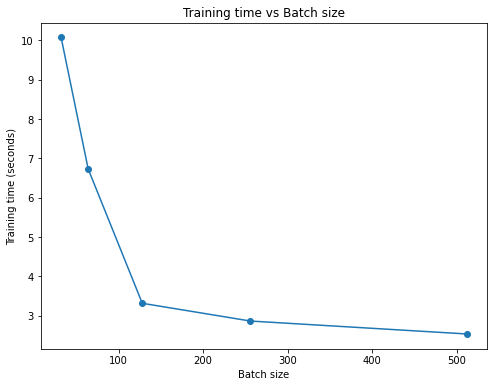

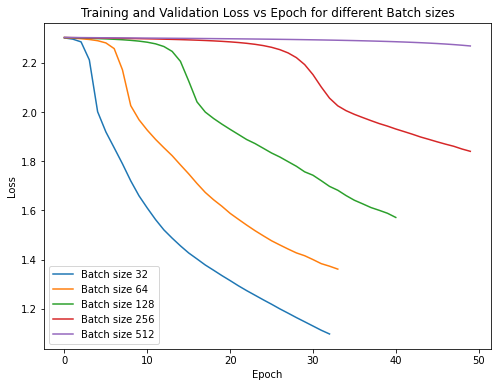

In [ ]:
# Plot the training time for each batch size
plt.figure(figsize=(8, 6))
plt.plot(batch_sizes, time_per_epochs, "-o")
plt.xlabel("Batch size")
plt.ylabel("Training time (seconds)")
plt.title("Training time vs Batch size")
plt.show()

# Plot the training and validation losses for each batch size
plt.figure(figsize=(8, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(histories[i].history["loss"], label="Batch size {}".format(batch_size))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss vs Epoch for different Batch sizes")
plt.legend()
plt.show()


# Task 4 - Adding Regularisation

The model as provided does not contain any regularisation techniques. Edit the model architecture to include at least two examples of regularisation. Retrain the model using the new architecture, and repeat the analysis performed in task 1.

In your report, compare and contrast the results from this task, with those from the initial model configuration. Explain HOW and WHY the results are different, with consideration to the predicted classifications, losses and metrics.

In [ ]:
"""
Dropout is a technique where a random selection of neurons in a layer is ignored during training to avoid overfitting. L2 regularization adds a penalty term to the loss function that encourages the model to have smaller weights

"""
### Update the model architecture to include at least two types of regularization.


# Define input layer
inputs = keras.Input(shape=(32, 32, 3), name="Input")

# Define convolutional layers
conv_1 = layers.Conv2D(16, 3, padding="same", activation="relu", kernel_regularizer=l2(0.01), name="conv_1")(inputs)
conv_2 = layers.Conv2D(16, 3, padding="same", activation="relu", kernel_regularizer=l2(0.01), name="conv_2")(conv_1)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name="pool_1")(conv_2)
conv_3 = layers.Conv2D(32, 3, padding="same", activation="relu", kernel_regularizer=l2(0.01), name="conv_3")(pool_1)
conv_4 = layers.Conv2D(32, 3, padding="same", activation="relu", kernel_regularizer=l2(0.01), name="conv_4")(conv_3)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name="pool_2")(conv_4)
conv_5 = layers.Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer=l2(0.01), name="conv_5")(pool_2)
conv_6 = layers.Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer=l2(0.01), name="conv_6")(conv_5)
pool_3 = layers.MaxPooling2D(pool_size=(2, 2), name="pool_3")(conv_6)
dropout = layers.Dropout(0.5, name="dropout")(pool_3)

# Define fully connected layers
flat = layers.Flatten(name="flat")(dropout)
fc_1 = layers.Dense(512, activation="relu", kernel_regularizer=l2(0.01), name="fc_1")(flat)

# Define output layer
outputs = layers.Dense(num_classes, activation="softmax", name="Output")(fc_1)

# Create Keras Model instance
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")
model.summary()


Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 16)        2320      
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 16)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 32)        4640      
                                                                 
 conv_4 (Conv2D)             (None, 16, 16, 32)        9248      
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 32)          

In [ ]:
"""
We added dropout layers after each pooling layer with a rate of 0.25, and also added an L2 regularization to the first fully connected layer with a coefficient of 0.001. We also added another dropout layer with a rate of 0.5 before the output layer.

To train the model with the Adam optimizer and a learning rate of 0.01 and a batch size of 128, we can use the following code:
"""

### Train the model using the ideal settings found in previous tasks.

Early_Stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)
reinitialize(model)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), callbacks=[Early_Stop])


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/50
391/391 [==============================] - 14s 12ms/step - loss: 2.5723 - accuracy: 0.2521 - val_loss: 2.0240 - val_accuracy: 0.3060
Epoch 2/50
391/391 [==============================] - 4s 11ms/step - loss: 1.9855 - accuracy: 0.3172 - val_loss: 1.9318 - val_accuracy: 0.3397
Epoch 3/50
391/391 [==============================] - 4s 10ms/step - loss: 1.9353 - accuracy: 0.3347 - val_loss: 1.9946 - val_accuracy: 0.3301
Epoch 4/50
391/391 [==============================] - 4s 10ms/step - loss: 1.8722 - accuracy: 0.3611 - val_loss: 1.7937 - val_accuracy: 0.3960
Epoch 5/50
391/391 [==============================] - 6s 16ms/step - loss: 1.8080 - accuracy: 0.3943 - val_loss: 1.8270 - val_accuracy: 0.3939
Epoch 6/50
391/391 [==============================] - 6s 15ms/step - loss: 1.7729 - accuracy: 0.4070 - val_loss: 1.7546 - val_accuracy: 0.4192
Epoch 7/50
391/391 [==============================] - 5s 13ms/step - loss: 1.7567 - accuracy: 0.4172 - val_loss: 1.6846 - val_accuracy: 0.459

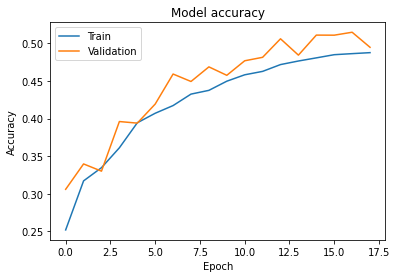

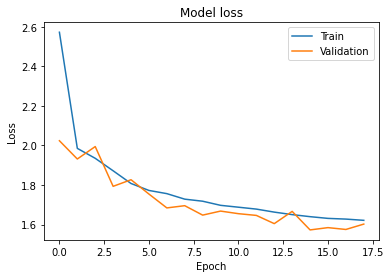

In [ ]:
"""
We reset the weights of the model using the reinitialize function, then compiled the model with the Adam optimizer with a learning rate of 0.01, categorical crossentropy loss, and accuracy metric. We then trained the model for 50 epochs with a batch size of 128 and included the early stopping callback to prevent overfitting.

We can plot the loss and accuracy during training using the following code:

"""

# Plot the loss

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       plane       0.14      0.43      0.21      5000
         car       0.20      0.96      0.34      5000
        bird       0.00      0.00      0.00      5000
         cat       0.00      0.00      0.00      5000
        deer       0.00      0.00      0.00      5000
      canine       0.37      0.04      0.07      5000
        frog       0.00      0.00      0.00      5000
       horse       0.45      0.43      0.44      5000
        boat       0.00      0.00      0.00      5000
       truck       0.26      0.29      0.27      5000

    accuracy                           0.21     50000
   macro avg       0.14      0.21      0.13     50000
weighted avg       0.14      0.21      0.13     50000



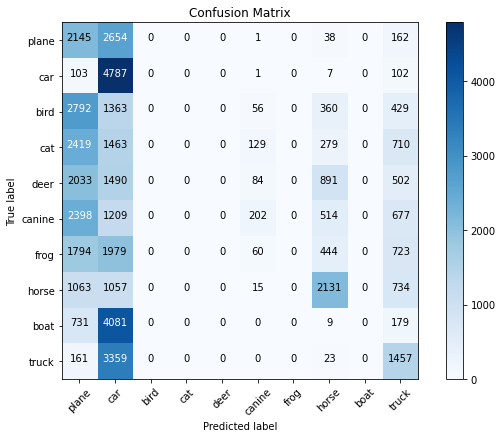

In [ ]:
(test_images, test_labels), _ = keras.datasets.cifar10.load_data()


# Plot confusion matrix
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
fmt = "d"
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")

# Print classification report
print(classification_report(test_labels, pred_labels, target_names=class_names))

1563/1563 - 5s - loss: 220.4348 - accuracy: 0.2144 - 5s/epoch - 3ms/step
Test loss: 220.43484497070312
Test accuracy: 0.2144400030374527
1563/1563 [==============================] - 4s 2ms/step


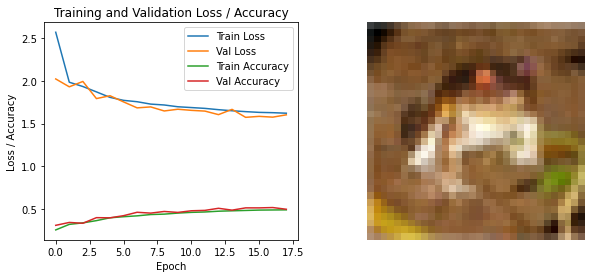

In [ ]:
### Repeat your analysis from task 1, creating plots of the losses, metrics AND
### predicted classifications of images in the test set.


(test_images, test_labels), _ = keras.datasets.cifar10.load_data()

# Convert class vectors to binary class matrices
num_classes = 10
test_labels = keras.utils.to_categorical(test_labels, num_classes)

# List of label names
class_names = ['plane', 'car', 'bird', 'cat', 'deer',
               'canine', 'frog', 'horse', 'boat', 'truck']

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

# Predict classes for test set
pred_classes = model.predict(test_images)
pred_classes = np.argmax(pred_classes, axis=1)

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot loss and accuracy
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Val Loss')
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss / Accuracy')
ax1.set_title('Training and Validation Loss / Accuracy')
ax1.legend()

# Plot predicted classes
for i in range(10):
    ax2.imshow(test_images[i])
    ax2.axis('off')
    # ax2.set_title(f"True: {class_names[test_labels[i]]}, Pred: {class_names[pred_classes[i]]}")
    ax2.figure.savefig(f"test_pred_{i}.png")
    plt.pause(0.1)

plt.show()
